In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
# https://scikit-learn.org/1.5/modules/generated/sklearn.preprocessing.StandardScaler.html

from sklearn.neighbors import KNeighborsClassifier
# https://scikit-learn.org/0.15/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

from sklearn.metrics import accuracy_score

import numpy as np
from sklearn.model_selection import cross_val_score

In [ ]:
# import kagglehub

# # Download latest version
# path = kagglehub.dataset_download("rabieelkharoua/air-quality-and-health-impact-dataset")

# print("Path to dataset files:", path)

In [ ]:
# Read the CSV file into a pandas DataFrame
df = pd.read_csv('/content/air_quality_health_impact_data.csv')
df.head()

,RecordID,AQI,PM10,PM2_5,NO2,SO2,O3,Temperature,Humidity,WindSpeed,RespiratoryCases,CardiovascularCases,HospitalAdmissions,HealthImpactScore,HealthImpactClass
0,1,187.270059,295.853039,13.038560,6.639263,66.161150,54.624280,5.150335,84.424344,6.137755,7,5,1,97.244041,0.0
1,2,475.357153,246.254703,9.984497,16.318326,90.499523,169.621728,1.543378,46.851415,4.521422,10,2,0,100.000000,0.0
2,3,365.996971,84.443191,23.111340,96.317811,17.875850,9.006794,1.169483,17.806977,11.157384,13,3,0,100.000000,0.0
3,4,299.329242,21.020609,14.273403,81.234403,48.323616,93.161033,21.925276,99.473373,15.302500,8,8,1,100.000000,0.0
4,5,78.009320,16.987667,152.111623,121.235461,90.866167,241.795138,9.217517,24.906837,14.534733,9,0,1,95.182643,0.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5811 entries, 0 to 5810
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   RecordID             5811 non-null   int64  
 1   AQI                  5811 non-null   float64
 2   PM10                 5811 non-null   float64
 3   PM2_5                5811 non-null   float64
 4   NO2                  5811 non-null   float64
 5   SO2                  5811 non-null   float64
 6   O3                   5811 non-null   float64
 7   Temperature          5811 non-null   float64
 8   Humidity             5811 non-null   float64
 9   WindSpeed            5811 non-null   float64
 10  RespiratoryCases     5811 non-null   int64  
 11  CardiovascularCases  5811 non-null   int64  
 12  HospitalAdmissions   5811 non-null   int64  
 13  HealthImpactScore    5811 non-null   float64
 14  HealthImpactClass    5811 non-null   float64
dtypes: float64(11), int64(4)
memory usage:

In [ ]:
df.describe()

,RecordID,AQI,PM10,PM2_5,NO2,SO2,O3,Temperature,Humidity,WindSpeed,RespiratoryCases,CardiovascularCases,HospitalAdmissions,HealthImpactScore,HealthImpactClass
count,5811.000000,5811.000000,5811.000000,5811.000000,5811.000000,5811.000000,5811.000000,5811.000000,5811.000000,5811.000000,5811.000000,5811.000000,5811.000000,5811.000000,5811.000000
mean,2906.000000,248.438476,148.654997,100.223714,102.293445,49.456838,149.312431,14.975500,54.776853,9.989177,9.974187,4.988986,2.001033,93.785223,0.281191
std,1677.635538,144.777638,85.698500,58.096612,57.713175,28.530329,86.534240,14.483067,26.020786,5.776950,3.129234,2.216791,1.398794,13.318904,0.714075
min,1.000000,0.005817,0.015848,0.031549,0.009625,0.011023,0.001661,-9.990998,10.001506,0.002094,1.000000,0.000000,0.000000,22.448488,0.000000
25%,1453.500000,122.951293,75.374954,49.435171,53.538538,24.887264,73.999665,2.481500,31.995262,4.952343,8.000000,3.000000,1.000000,98.203057,0.000000
50%,2906.000000,249.127841,147.634997,100.506337,102.987736,49.530165,149.559871,14.942428,54.543904,10.051742,10.000000,5.000000,2.000000,100.000000,0.000000
75%,4358.500000,373.630668,222.436759,151.340260,151.658516,73.346617,223.380126,27.465374,77.641639,14.971840,12.000000,6.000000,3.000000,100.000000,0.000000
max,5811.000000,499.858837,299.901962,199.984965,199.980195,99.969561,299.936812,39.963434,99.997493,19.999139,23.000000,14.000000,12.000000,100.000000,4.000000


In [ ]:
df.nunique()

,0
RecordID,5811
AQI,5811
PM10,5811
PM2_5,5811
NO2,5811
SO2,5811
O3,5811
Temperature,5811
Humidity,5811
WindSpeed,5811


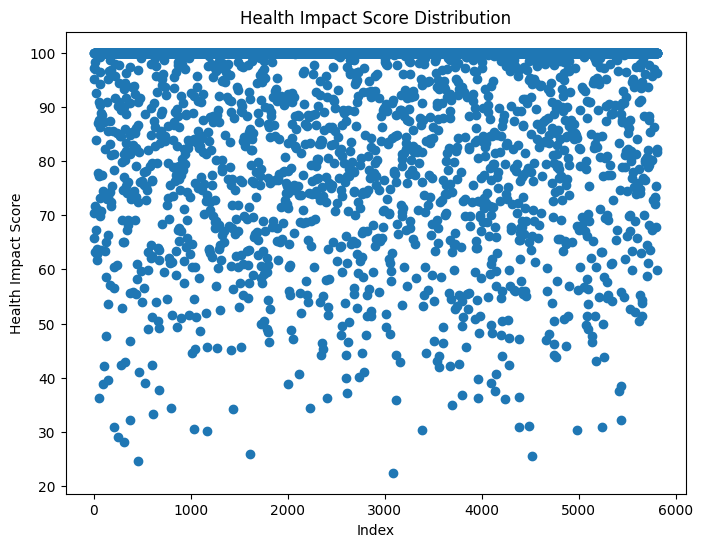

In [ ]:

plt.figure(figsize=(8, 6))
plt.scatter(df.index, df['HealthImpactScore'])
plt.xlabel("Index")
plt.ylabel("Health Impact Score")
plt.title("Health Impact Score Distribution")
plt.show()

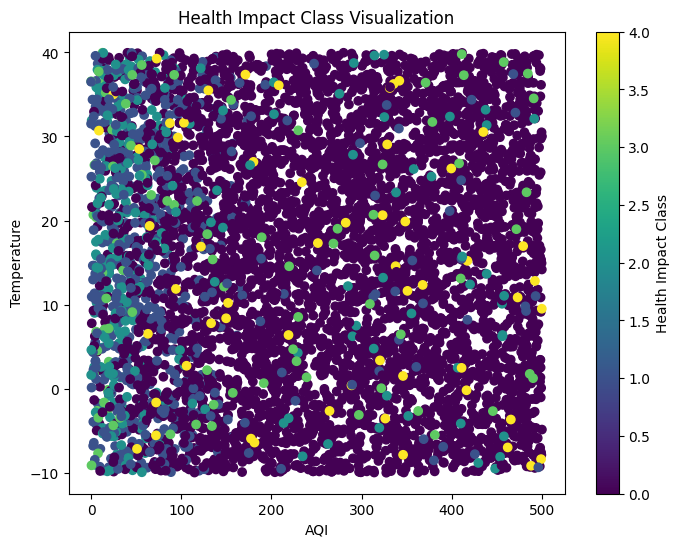

In [ ]:

plt.figure(figsize=(8, 6))
plt.scatter(df['AQI'], df['Temperature'], c=df['HealthImpactClass'])
plt.xlabel("AQI")
plt.ylabel("Temperature")
plt.title("Health Impact Class Visualization")
plt.colorbar(label="Health Impact Class")
plt.show()

In [ ]:
df.isnull().sum()

,0
RecordID,0
AQI,0
PM10,0
PM2_5,0
NO2,0
SO2,0
O3,0
Temperature,0
Humidity,0
WindSpeed,0


In [ ]:
cat_cols=df.select_dtypes(include=['object']).columns.tolist()
num_cols = df.select_dtypes(include=np.number).columns.tolist()
print("Categorical Variables:")
print(cat_cols)
print("Numerical Variables:")
print(num_cols)

Categorical Variables:
[]
Numerical Variables:
['RecordID', 'AQI', 'PM10', 'PM2_5', 'NO2', 'SO2', 'O3', 'Temperature', 'Humidity', 'WindSpeed', 'RespiratoryCases', 'CardiovascularCases', 'HospitalAdmissions', 'HealthImpactScore', 'HealthImpactClass']


In [ ]:
df.shape

(5811, 15)

In [ ]:
df = df.drop_duplicates()
df.shape

(5811, 15)

In [ ]:
X = df.drop(['RecordID','HealthImpactClass'], axis=1)
y = df['HealthImpactClass']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3)

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
k = 10
knn = KNeighborsClassifier(n_neighbors=k, metric = 'euclidean')
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.92


In [ ]:
for k in range(6, 21):
    knn = KNeighborsClassifier(n_neighbors=k, metric='manhattan')
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f'Accuracy for k = {k}: {accuracy:.2f}')

Accuracy for k = 6: 0.92
Accuracy for k = 7: 0.93
Accuracy for k = 8: 0.93
Accuracy for k = 9: 0.93
Accuracy for k = 10: 0.93
Accuracy for k = 11: 0.93
Accuracy for k = 12: 0.93
Accuracy for k = 13: 0.93
Accuracy for k = 14: 0.93
Accuracy for k = 15: 0.93
Accuracy for k = 16: 0.93
Accuracy for k = 17: 0.93
Accuracy for k = 18: 0.93
Accuracy for k = 19: 0.93
Accuracy for k = 20: 0.93


# KNN regressor


In [ ]:
X2 = df.drop(['HealthImpactClass','HealthImpactScore'], axis=1)
y2 = df['HealthImpactScore']
features_train, features_test, target_train, target_test = train_test_split(X2, y2, test_size=0.2, random_state=3)

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score

knn_regressor = KNeighborsRegressor(n_neighbors=5)
knn_regressor.fit(features_train, target_train)

predictions = knn_regressor.predict(features_test)
r2 = r2_score(target_test, predictions)
print(r2)

0.8059530795958565


# Support Vector Machine

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

X = df.drop(['RecordID','HealthImpactClass'], axis=1)
y = df['HealthImpactClass']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

svm = SVC(kernel='linear', C=1)
svm.fit(X_train, y_train)

y_pred = svm.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"SVM Accuracy: {accuracy}")

SVM Accuracy: 0.942390369733448


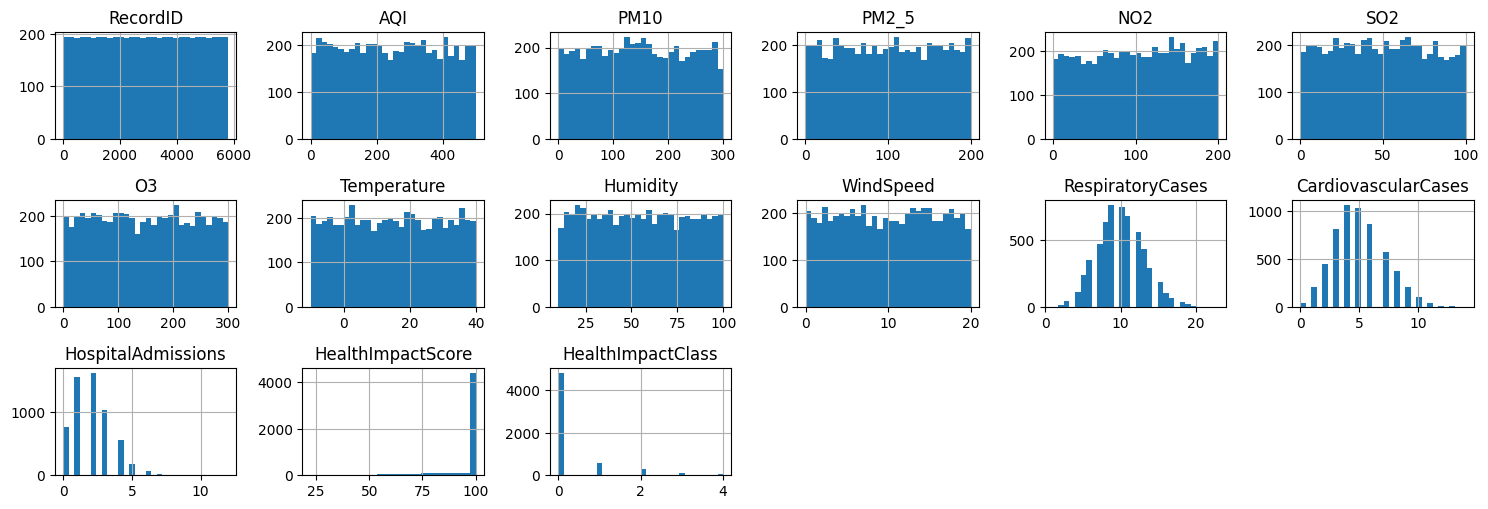

In [ ]:
df.hist(bins=30, figsize=(15, 10), layout=(6, 6))

plt.tight_layout()
plt.show()

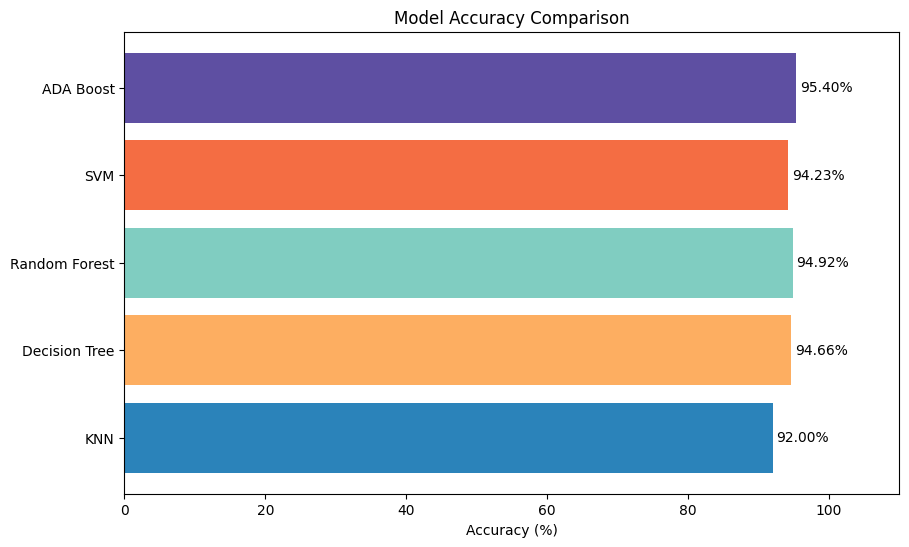

In [ ]:
accuracy_percentages = {
    'KNN': 0.92 * 100,
    'Decision Tree': 0.9466 * 100,
    'Random Forest': 0.9492 * 100,
    'SVM': 0.9423 * 100,
    'ADA Boost': 0.954 * 100,
    }

models = list(accuracy_percentages.keys())
accuracy_values = list(accuracy_percentages.values())

# Formal colors for research
colors = ['#2b83ba', '#fdae61', '#80cdc1', '#f46d43', '#5e4fa2']
 #  blue, orange, green, red, purple (modified to avoid specified colors)

plt.figure(figsize=(10, 6))
plt.barh(models, accuracy_values, color=colors)
plt.xlabel('Accuracy (%)')
plt.title('Model Accuracy Comparison')
plt.xlim(0, 110)

for index, value in enumerate(accuracy_values):
    plt.text(value + 0.5, index, f'{value:.2f}%', va='center')

plt.show()